# Data preprocessing

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## reading data from csv

In [19]:
data=pd.read_csv("hotelsBookingDemand.csv")

In [20]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [21]:
data.sample(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
58915,City Hotel,1,605,2016,October,43,17,1,2,2,...,Non Refund,1.0,NaN,0,Transient,60.00,0,0,Canceled,2016-09-20
107003,City Hotel,0,133,2017,March,9,3,1,2,2,...,No Deposit,9.0,NaN,0,Transient,93.60,0,2,Check-Out,2017-03-06
90185,City Hotel,0,29,2016,May,23,31,0,3,2,...,No Deposit,7.0,NaN,0,Transient,82.61,0,1,Check-Out,2016-06-03
34459,Resort Hotel,0,96,2017,March,12,19,2,5,2,...,No Deposit,177.0,NaN,0,Transient-Party,34.00,0,0,Check-Out,2017-03-26
73144,City Hotel,1,281,2017,August,33,15,0,4,2,...,Non Refund,229.0,NaN,0,Transient,90.00,0,0,Canceled,2017-08-04
51607,City Hotel,0,160,2016,May,22,22,2,2,2,...,No Deposit,9.0,NaN,0,Transient,99.45,0,1,Check-Out,2016-05-26
62785,City Hotel,1,30,2017,January,4,22,2,0,2,...,No Deposit,9.0,NaN,0,Transient,97.50,0,3,Canceled,2017-01-13
27798,Resort Hotel,0,13,2016,September,37,5,1,5,2,...,No Deposit,240.0,NaN,0,Transient,159.00,0,1,Check-Out,2016-09-11
82330,City Hotel,0,24,2015,December,52,24,2,3,2,...,No Deposit,28.0,NaN,0,Transient,58.00,0,1,Check-Out,2015-12-29
36508,Resort Hotel,0,118,2017,May,21,22,1,0,2,...,No Deposit,251.0,NaN,0,Transient-Party,62.00,0,0,Check-Out,2017-05-23


## 1)missing values

In [22]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

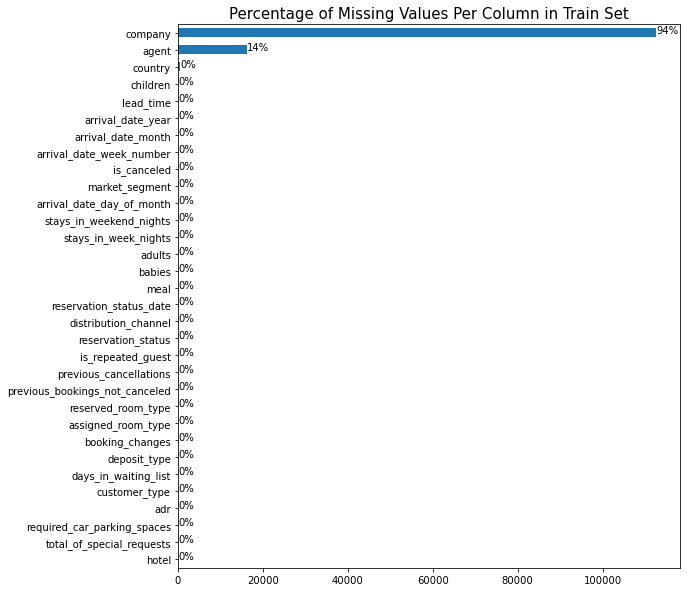

In [23]:
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))


## 2) deleting missing values

In [24]:
data.dropna(subset=['children','country'],axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)

In [25]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

In [26]:
data.shape

(118898, 32)

## 3) datetime data

In [27]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [28]:
data["arrival_date_month"]=pd.to_datetime(data['arrival_date_month'],format='%B').dt.month

In [29]:
dict={"year":data["arrival_date_year"].values,
      "month":data["arrival_date_month"].values,
      "day":data["arrival_date_day_of_month"].values}

data["arrival_date"]=pd.to_datetime(dict,errors='ignore')

In [30]:
data.sample(30)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
3894,Resort Hotel,1,72,2016,2,6,6,2,1,2,...,NaN,NaN,0,Transient-Party,73.33,0,0,Canceled,2016-01-19,2016-02-06
25359,Resort Hotel,0,205,2016,7,28,4,3,6,2,...,69.0,NaN,0,Transient,85.67,0,1,Check-Out,2016-07-13,2016-07-04
100308,City Hotel,0,37,2016,10,44,29,2,2,2,...,28.0,NaN,0,Transient,75.00,0,0,Check-Out,2016-11-02,2016-10-29
414,Resort Hotel,0,57,2015,7,29,15,0,2,2,...,305.0,NaN,0,Transient-Party,107.00,0,0,Check-Out,2015-07-17,2015-07-15
100133,City Hotel,0,35,2016,10,44,27,0,3,2,...,9.0,NaN,0,Transient,118.00,1,2,Check-Out,2016-10-30,2016-10-27
92705,City Hotel,0,156,2016,7,29,11,2,5,2,...,86.0,NaN,0,Transient,94.91,0,1,Check-Out,2016-07-18,2016-07-11
24314,Resort Hotel,0,62,2016,6,23,2,0,1,2,...,240.0,NaN,0,Transient-Party,128.00,0,0,Check-Out,2016-06-03,2016-06-02
103215,City Hotel,0,65,2016,12,53,26,1,3,2,...,9.0,NaN,0,Transient,105.61,0,1,Check-Out,2016-12-30,2016-12-26
90911,City Hotel,0,5,2016,6,26,20,1,0,1,...,NaN,227.0,0,Transient,95.00,0,0,Check-Out,2016-06-21,2016-06-20
22890,Resort Hotel,0,1,2016,4,17,22,0,1,2,...,5.0,NaN,0,Transient,68.00,0,0,Check-Out,2016-04-23,2016-04-22


## 4) verification

In [31]:
data["reservation_status_date"]=pd.to_datetime(data["reservation_status_date"], format = '%Y-%m-%d')

In [32]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118893,City Hotel,0,23,2017,8,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
118894,City Hotel,0,102,2017,8,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
118895,City Hotel,0,34,2017,8,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
118896,City Hotel,0,109,2017,8,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [33]:
(data["reservation_status_date"]>=data["arrival_date"]).all()

False

In [34]:
(data["reservation_status_date"]>=data["arrival_date"]).head(100)

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96     True
97     True
98     True
99     True
Length: 100, dtype: bool

In [35]:
data.iloc[95,:]

hotel                                    Resort Hotel
is_canceled                                         1
lead_time                                          63
arrival_date_year                                2015
arrival_date_month                                  7
arrival_date_week_number                           27
arrival_date_day_of_month                           3
stays_in_weekend_nights                             2
stays_in_week_nights                                5
adults                                              2
children                                            0
babies                                              0
meal                                               BB
country                                           PRT
market_segment                              Online TA
distribution_channel                            TA/TO
is_repeated_guest                                   0
previous_cancellations                              0
previous_bookings_not_cancel

# Change missing value 

In [36]:
data['company'].value_counts().head()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
Name: company, dtype: int64

In [37]:
for col in ['agent','company']:
    data[col] =data[col].fillna(data[col].mean())

In [38]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Delete duplicating data

In [39]:
data.duplicated().any()

True

In [40]:
data.drop_duplicates( inplace = True)

In [41]:
data.duplicated().any()

False

In [42]:
data.shape

(86940, 33)

In [43]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int64
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [44]:
data=data.drop(columns=['arrival_date_year','arrival_date_month','arrival_date_day_of_month'])

In [45]:
data.shape

(86940, 30)

# feature engineering

In [46]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [47]:
cat_Variables=["hotel","meal","country","market_segment","distribution_channel",
                "reserved_room_type","assigned_room_type","deposit_type",
                "customer_type","reservation_status","company","agent","is_canceled"]

date_Variables=["reservation_status_date","arrival_date"]


Numerical_Variables=["lead_time","arrival_date_week_number","stays_in_weekend_nights",
                    "stays_in_week_nights","adults","children","babies",
                    "is_repeated_guest","previous_cancellations","previous_bookings_not_canceled",
                    "booking_changes","days_in_waiting_list","adr",
                    "required_car_parking_spaces","total_of_special_requests"]

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
data[cat_Variables[1:10]]=data[cat_Variables[1:10]].astype('category')

In [50]:
data[cat_Variables[1:10]]=data[cat_Variables[1:10]].apply(lambda x:LabelEncoder().fit_transform(x))

In [51]:
data['hotel_cat']=LabelEncoder().fit_transform(data['hotel'])

In [52]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_week_number                   int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                       int32
country                                    int32
market_segment                             int32
distribution_channel                       int32
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                         int32
assigned_room_type                         int32
booking_changes                            int64
deposit_type                               int32
agent               

#  Exploratory data analysis

In [53]:
data[date_Variables].describe(datetime_is_numeric=True)

,reservation_status_date,arrival_date
count,86940,86940
mean,2016-08-31 15:45:23.478307584,2016-09-15 14:25:16.521746688
min,2014-10-17 00:00:00,2015-07-01 00:00:00
25%,2016-03-19 00:00:00,2016-04-02 00:00:00
50%,2016-09-08 00:00:00,2016-09-20 00:00:00
75%,2017-03-06 00:00:00,2017-04-02 00:00:00
max,2017-09-14 00:00:00,2017-08-31 00:00:00


In [54]:
data[cat_Variables].describe()

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,company,agent,is_canceled
count,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000
mean,0.561836,86.631585,5.083874,2.533667,1.259903,1.663458,0.014389,2.056085,0.747331,189.260456,92.924261,0.275903
std,1.084299,44.706366,1.337726,0.939334,1.834906,1.987533,0.129011,0.530969,0.460504,31.761956,105.140085,0.446971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000
25%,0.000000,51.000000,5.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,189.624792,9.000000,0.000000
50%,0.000000,72.000000,6.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,189.624792,28.000000,0.000000
75%,0.000000,135.000000,6.000000,3.000000,3.000000,3.000000,0.000000,2.000000,1.000000,189.624792,240.000000,1.000000
max,4.000000,176.000000,6.000000,4.000000,9.000000,11.000000,2.000000,3.000000,2.000000,543.000000,535.000000,1.000000


In [55]:
data[Numerical_Variables].describe()

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000
mean,80.193375,26.841477,1.007396,2.628744,1.878525,0.139211,0.010835,0.039234,0.030228,0.176708,0.271854,0.753497,106.574804,0.083448,0.699459
std,86.100147,13.654505,1.028763,2.043753,0.625860,0.456786,0.113592,0.194152,0.369574,1.717885,0.728090,10.041816,54.957439,0.280402,0.831840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,12.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,50.000000,27.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000
75%,125.000000,37.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,737.000000,53.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# 4

C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


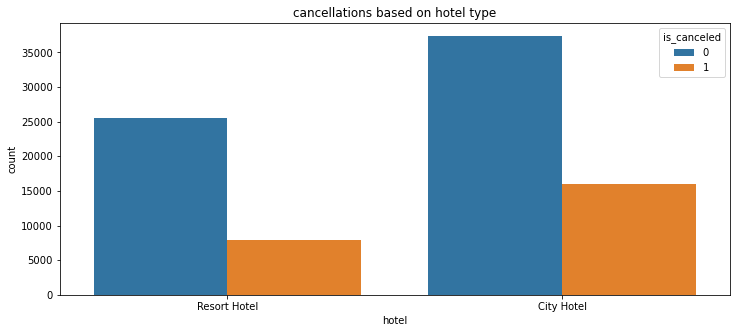

In [56]:
plt.figure(figsize=(12,5))
sns.countplot('hotel',data=data,hue='is_canceled')
plt.title('cancellations based on hotel type')
plt.show()

# 5

C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


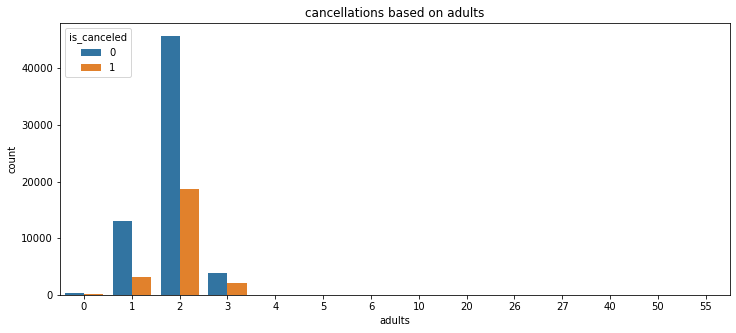

In [57]:
plt.figure(figsize=(12,5))
sns.countplot('adults',data=data,hue='is_canceled')
plt.title('cancellations based on adults')
plt.show()

# Modeling

In [58]:
from sklearn.model_selection import train_test_split

In [45]:
import datetime as dt

data['arrival_date_num']=data['arrival_date'].map(dt.datetime.toordinal)
data['reservation_status_date_num']=data['reservation_status_date'].map(dt.datetime.toordinal)

In [59]:
main_cols = data.columns.difference(['hotel', 'is_canceled','arrival_date','reservation_status_date'])
X = data[main_cols]
y = data["is_canceled"].astype(int)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=33)

In [64]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix

In [68]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
# Train model
model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'LGBM AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

LGBM AUC score on the X_test is: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18981
           1       1.00      1.00      1.00      7101

    accuracy                           1.00     26082
   macro avg       1.00      1.00      1.00     26082
weighted avg       1.00      1.00      1.00     26082



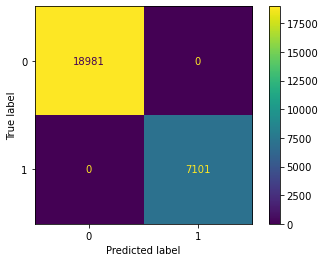

In [65]:
plot_confusion_matrix(model,X_test,y_test)

In [67]:
import Utilefunctions

In [69]:
# Select algorithm
model = DecisionTreeClassifier()
# Fit model to the data
model.fit(X_train, y_train)
# Check model performance on training data
predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

1.0


In [70]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0
